### Problem Statement: Predicting Annual Rainfall Using Machine Learning

### Importing the required libraries 

In [97]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline

In [98]:
df = pd.read_csv("Rainfall prediction dataset.csv")
df.head()

SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   1977.6    571.0  
4   1624.9    630.8

## Data Exploration and Pre-Processing

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [100]:
df.describe()

YEAR          JAN          FEB          MAR          APR  \
count  4116.000000  4112.000000  4113.000000  4110.000000  4112.000000   
mean   1958.218659    18.957320    21.805325    27.359197    43.127432   
std      33.140898    33.585371    35.909488    46.959424    67.831168   
min    1901.000000     0.000000     0.000000     0.000000     0.000000   
25%    1930.000000     0.600000     0.600000     1.000000     3.000000   
50%    1958.000000     6.000000     6.700000     7.800000    15.700000   
75%    1987.000000    22.200000    26.800000    31.300000    49.950000   
max    2015.000000   583.700000   403.500000   605.600000   595.100000   

               MAY          JUN          JUL          AUG          SEP  \
count  4113.000000  4111.000000  4109.000000  4112.000000  4110.000000   
mean     85.745417   230.234444   347.214334   290.263497   197.361922   
std     123.234904   234.710758   269.539667   188.770477   135.408345   
min       0.000000     0.400000     0.000000     0.000000     0.100000   
25%       8.600000    70.350000   175.600000   155.975000   100.525000   
50%      36.600000   138.700000   284.800000   259.400000   173.900000   
75%      97.200000   305.150000   418.400000   377.800000   265.800000   
max    1168.600000  1609.900000  2362.800000  1664.600000  1222.000000   

               OCT          NOV          DEC       ANNUAL      Jan-Feb  \
count  4109.000000  4105.000000  4106.000000  4090.000000  4110.000000   
mean     95.507009    39.866163    18.870580  1411.008900    40.747786   
std      99.519134    68.685410    42.369611   903.846565    59.308277   
min       0.000000     0.000000     0.000000    62.300000     0.000000   
25%      14.600000     0.700000     0.100000   804.500000     4.100000   
50%      65.200000     9.500000     3.000000  1121.300000    19.200000   
75%     148.400000    46.100000    17.500000  1644.775000    50.375000   
max     948.300000   648.900000   617.500000  6331.100000   699.500000   

           Mar-May      Jun-Sep      Oct-Dec  
count  4107.000000  4106.000000  4103.000000  
mean    155.901753  1064.724769   154.100487  
std     201.316965   707.741531   166.942660  
min       0.000000    57.400000     0.000000  
25%      24.050000   573.850000    34.200000  
50%      74.800000   881.100000    98.200000  
75%     196.950000  1288.175000   213.500000  
max    1745.800000  4536.900000  1252.500000

In [101]:
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [102]:
df.duplicated().sum()

0

In [103]:
df['SUBDIVISION'].value_counts()

WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH                

In [104]:
df.mean(numeric_only=True)

YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64

In [105]:
# filling na values with mean
df = df.fillna(df.mean(numeric_only=True))

In [106]:
df.head(25)

SUBDIVISION  YEAR    JAN    FEB         MAR    APR    MAY  \
0   ANDAMAN & NICOBAR ISLANDS  1901   49.2   87.1   29.200000    2.3  528.8   
1   ANDAMAN & NICOBAR ISLANDS  1902    0.0  159.8   12.200000    0.0  446.1   
2   ANDAMAN & NICOBAR ISLANDS  1903   12.7  144.0    0.000000    1.0  235.1   
3   ANDAMAN & NICOBAR ISLANDS  1904    9.4   14.7    0.000000  202.4  304.5   
4   ANDAMAN & NICOBAR ISLANDS  1905    1.3    0.0    3.300000   26.9  279.5   
5   ANDAMAN & NICOBAR ISLANDS  1906   36.6    0.0    0.000000    0.0  556.1   
6   ANDAMAN & NICOBAR ISLANDS  1907  110.7    0.0  113.300000   21.6  616.3   
7   ANDAMAN & NICOBAR ISLANDS  1908   20.9   85.1    0.000000   29.0  562.0   
8   ANDAMAN & NICOBAR ISLANDS  1910   26.6   22.7  206.300000   89.3  224.5   
9   ANDAMAN & NICOBAR ISLANDS  1911    0.0    8.4    0.000000  122.5  327.3   
10  ANDAMAN & NICOBAR ISLANDS  1912  583.7    0.8    0.000000   21.9  140.7   
11  ANDAMAN & NICOBAR ISLANDS  1913   84.8    0.5    1.300000    2.5  190.7   
12  ANDAMAN & NICOBAR ISLANDS  1914    0.0    0.0    0.000000   37.7  298.8   
13  ANDAMAN & NICOBAR ISLANDS  1915   45.0   56.7   33.300000   40.9  170.2   
14  ANDAMAN & NICOBAR ISLANDS  1916    0.0    0.0    0.000000    0.5  487.4   
15  ANDAMAN & NICOBAR ISLANDS  1917    8.0    3.6  112.000000    4.5  295.9   
16  ANDAMAN & NICOBAR ISLANDS  1918   77.4    6.9   11.400000   10.7  729.3   
17  ANDAMAN & NICOBAR ISLANDS  1919   10.2   18.0    0.000000   35.5  283.9   
18  ANDAMAN & NICOBAR ISLANDS  1920  122.3    7.4    3.100000   13.0  237.4   
19  ANDAMAN & NICOBAR ISLANDS  1921   13.2    3.1    0.000000   37.5  351.2   
20  ANDAMAN & NICOBAR ISLANDS  1922  245.3   34.3   15.600000  323.1  289.7   
21  ANDAMAN & NICOBAR ISLANDS  1923   79.5    0.0   27.359197   91.3  293.5   
22  ANDAMAN & NICOBAR ISLANDS  1924   28.7    0.0   14.800000   89.7  191.2   
23  ANDAMAN & NICOBAR ISLANDS  1925   36.6    0.0    8.600000   50.4  282.2   
24  ANDAMAN & NICOBAR ISLANDS  1926  122.1    0.0    0.000000    0.5  198.4   

      JUN    JUL    AUG    SEP    OCT    NOV        DEC     ANNUAL  Jan-Feb  \
0   517.5  365.1  481.1  332.6  388.5  558.2   33.60000  3373.2000    136.3   
1   537.1  228.9  753.7  666.2  197.2  359.0  160.50000  3520.7000    159.8   
2   479.9  728.4  326.7  339.0  181.2  284.4  225.00000  2957.4000    156.7   
3   495.1  502.0  160.1  820.4  222.2  308.7   40.10000  3079.6000     24.1   
4   628.7  368.7  330.5  297.0  260.7   25.4  344.70000  2566.7000      1.3   
5   733.3  247.7  320.5  164.3  267.8  128.9   79.20000  2534.4000     36.6   
6   305.2  443.9  377.6  200.4  264.4  648.9  245.60000  3347.9000    110.7   
7   693.6  481.4  699.9  428.8  170.7  208.1  196.90000  3576.4000    106.0   
8   472.7  264.3  337.4  626.6  208.2  267.3  153.50000  2899.4000     49.3   
9   649.0  253.0  187.1  464.5  333.8   94.5  247.10000  2687.2000      8.4   
10  549.8  468.9  370.3  386.2  318.7  117.2    2.30000  2960.5000    584.5   
11  530.0  280.8  205.8  580.1  288.8  133.0   67.50000  2365.8000     85.3   
12  383.3  792.8  520.5  310.8  139.8  184.4  289.70000  2957.8000      0.0   
13  334.7  269.0  317.2  429.8  468.1  258.4  318.00000  2741.3000    101.7   
14  450.1  317.3  425.0  561.2  369.7  192.6  133.70000  2937.5000      0.0   
15  301.1  394.8  437.4  471.8  238.1  108.3  236.90000  2612.4000     11.6   
16  710.8  200.9  455.4  303.3  227.0  366.9  175.00000  3275.0000     84.3   
17  542.5  246.5  259.8  170.7  186.2  340.4  258.40000  2352.1000     28.2   
18  546.9  294.4  467.4  505.4  397.5  262.9   85.50000  2943.2000    129.7   
19  282.7  487.1  330.0  581.2  360.7  118.2   41.50000  2606.4000     16.3   
20  506.1  425.8  307.4  511.7  162.0  541.0  192.20000  3554.2000    279.6   
21  808.4  636.9  182.2  560.5  131.9  197.4   70.60000  1411.0089     79.5   
22  261.2  493.3  290.9  251.2  331.1  378.6   18.87058  1411.0089     28.7   
23  663.8  241.8  278.2  201.9  249.5  271.5  196.00000  2480.5000 

In [107]:
df.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [108]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909], dtype=int64)

In [109]:
df.shape

(4116, 19)

## Data Visualization

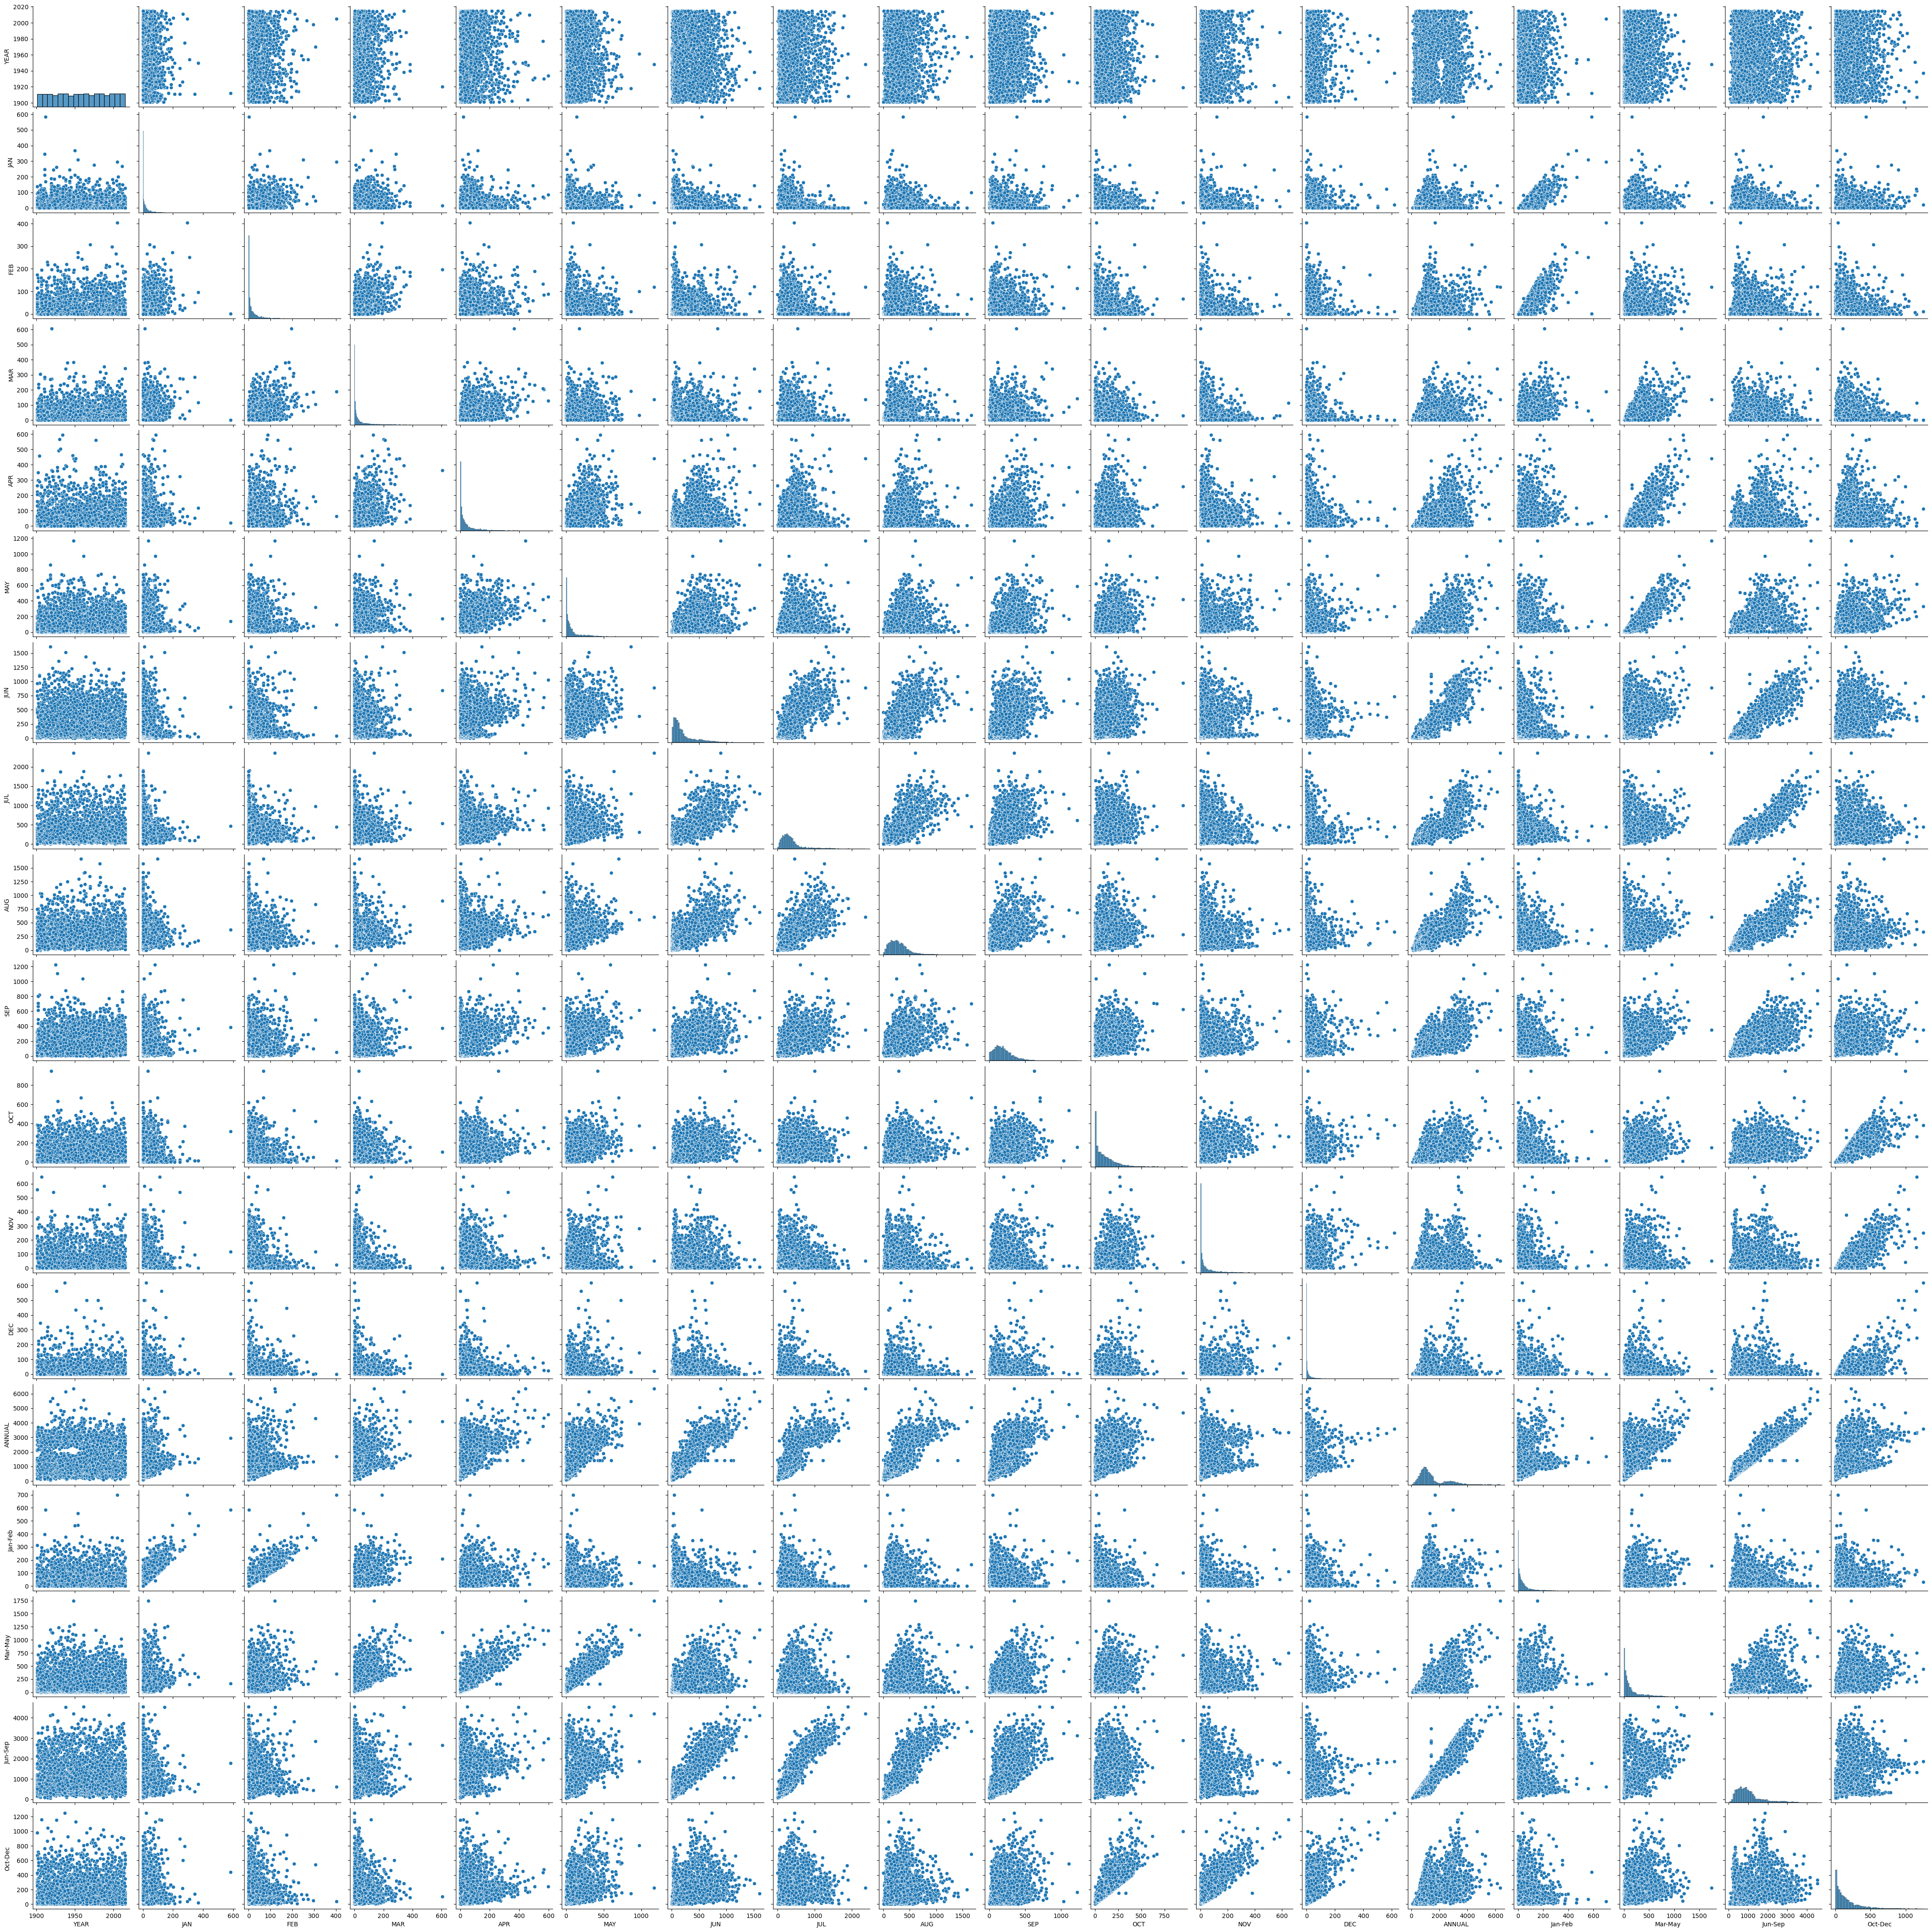

In [110]:
sns.pairplot(df)

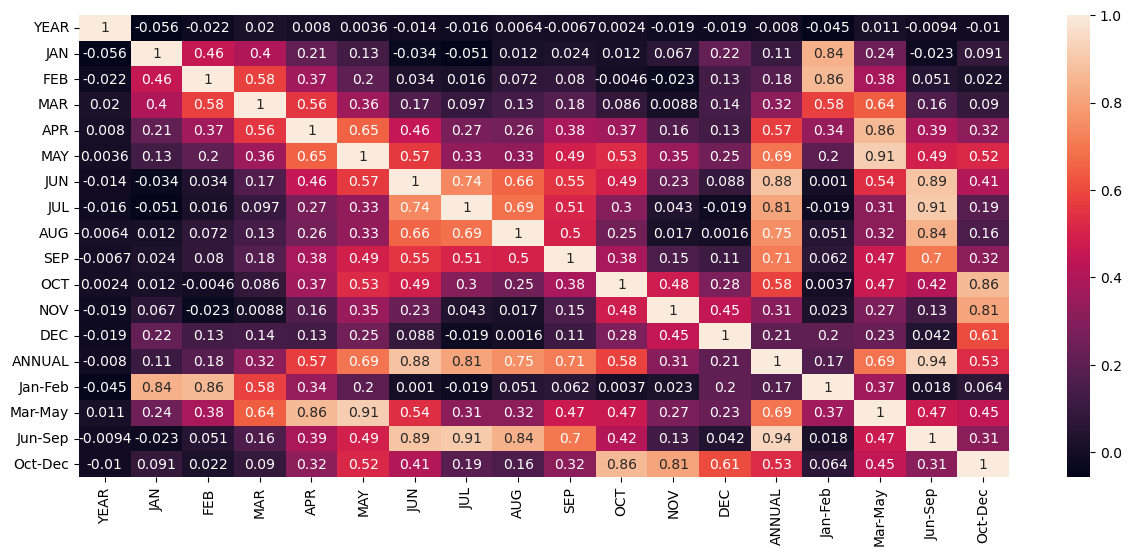

In [111]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

`The above heatmap shows the coorelation between different features in the dataset`

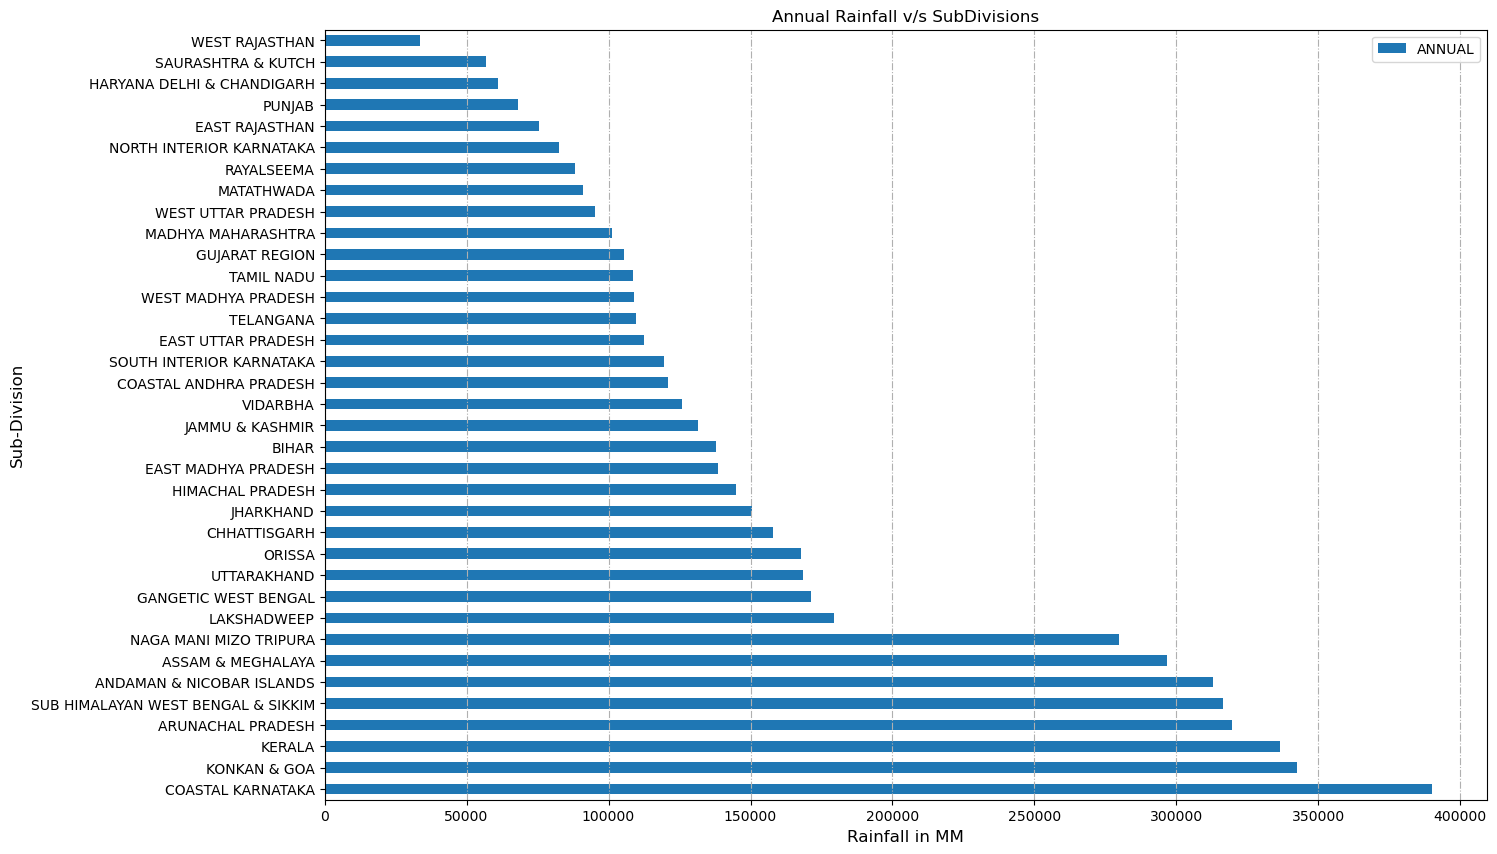

In [112]:
df[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

`Above I grouped all the country values using group by and plotted bar plot of all states in an ascending order.`

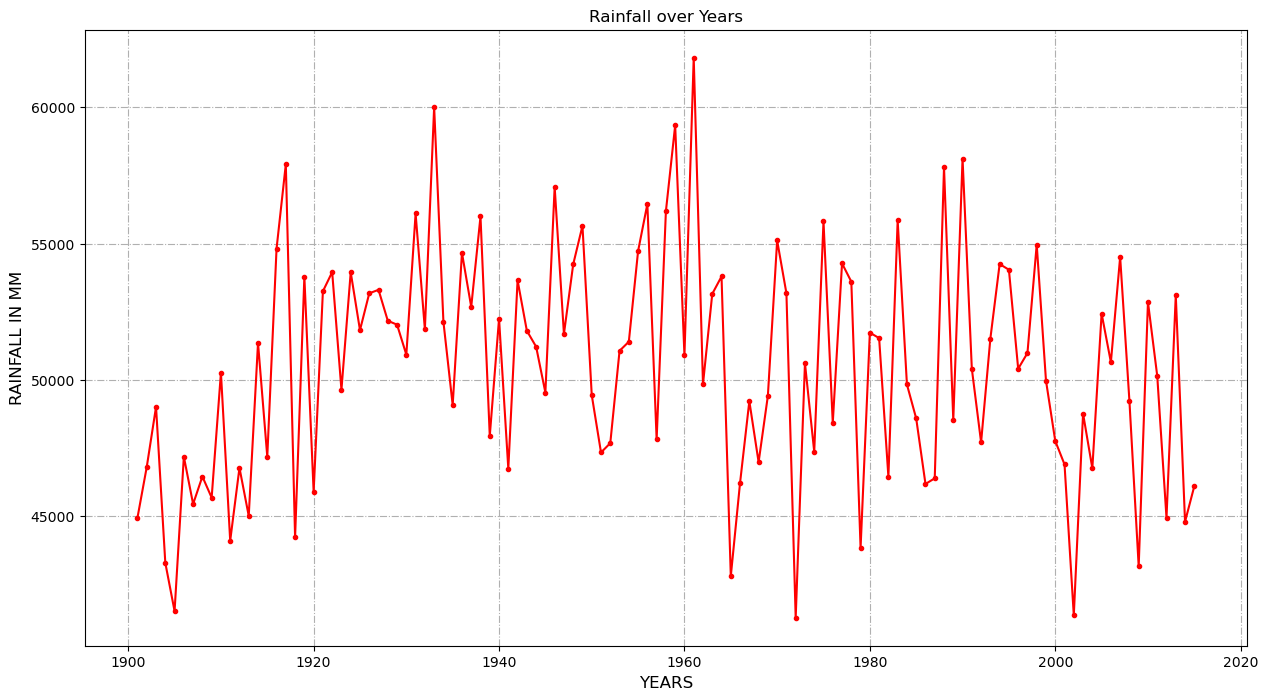

In [113]:
plt.figure(figsize=(15,8))
df.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

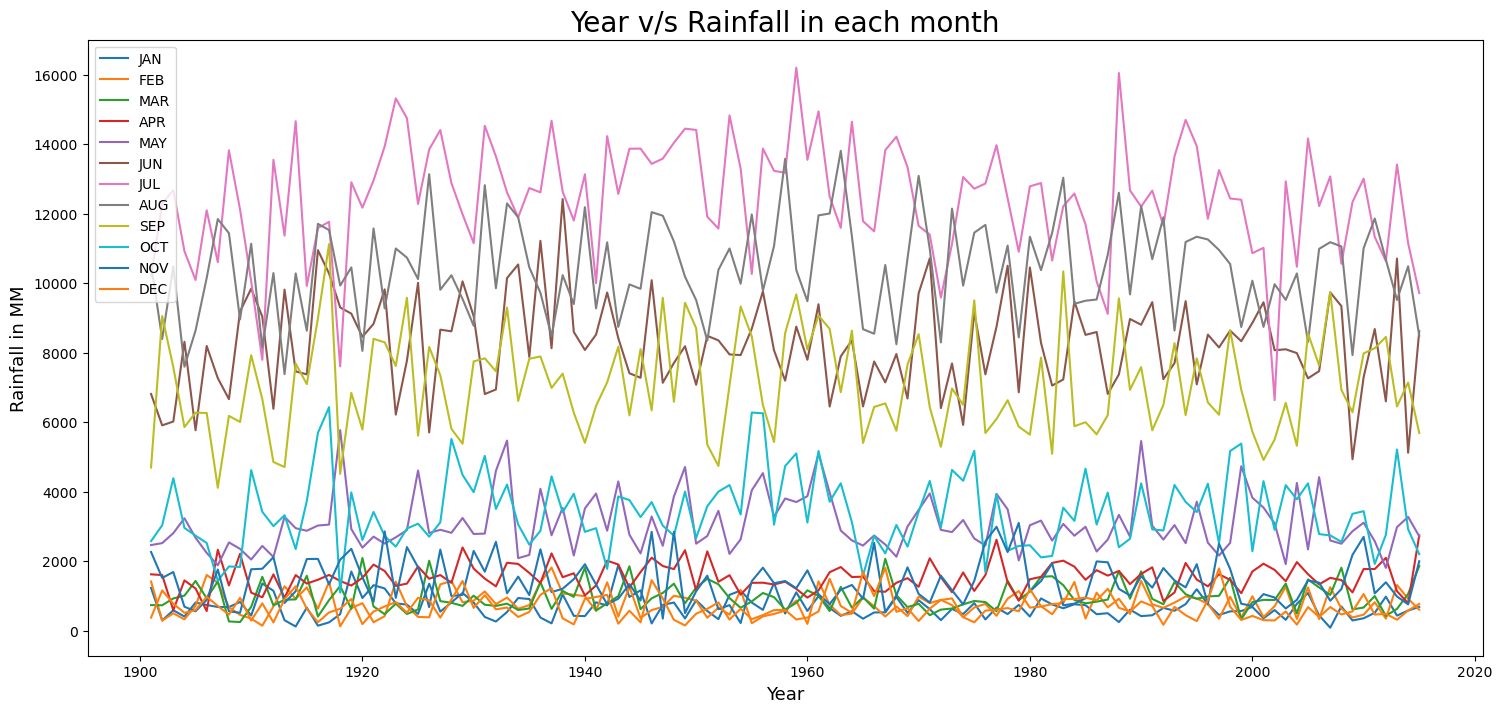

In [114]:
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
      'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(18,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

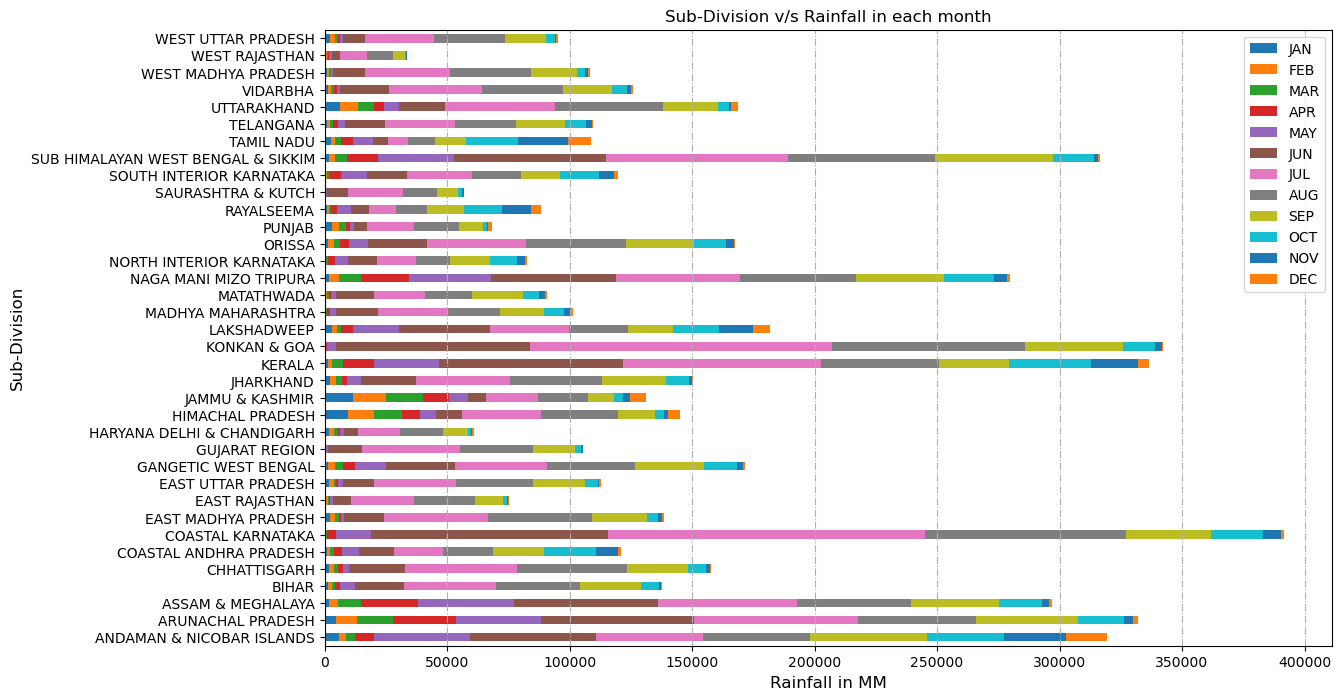

In [115]:
df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(13,8))
plt.title("Sub-Division v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

### Analysis of rainfall data of CHHATTISGARH

In [116]:
V = df.loc[((df['SUBDIVISION'] == 'CHHATTISGARH'))]
V.head(5)

SUBDIVISION  YEAR   JAN    FEB   MAR   APR   MAY    JUN    JUL    AUG  \
2967  CHHATTISGARH  1901  48.9  116.5  27.8   5.5  18.4  101.6  381.0  476.7   
2968  CHHATTISGARH  1902   0.6    6.5   0.4  13.9  10.3   37.2  403.8  236.6   
2969  CHHATTISGARH  1903   6.2   13.9   0.4   6.8  51.1  110.7  365.9  396.0   
2970  CHHATTISGARH  1904   0.0    8.6  32.3   0.2  77.5  369.5  303.6  483.6   
2971  CHHATTISGARH  1905  50.3   22.6  19.0  24.6  31.8   40.4  443.7  270.8   

        SEP    OCT  NOV  DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
2967  182.8   27.3  0.4  0.0  1387.0    165.4     51.7   1142.2     27.7  
2968  198.1    4.7  8.1  3.7   923.9      7.1     24.6    875.7     16.5  
2969  212.0  168.0  0.1  0.0  1331.2     20.1     58.3   1084.7    168.1  
2970   86.8  129.3  1.0  0.0  1492.4      8.6    110.0   1243.5    130.4  
2971  338.8    8.9  0.0  0.0  1251.1     72.9     75.5   1093.8      8.9

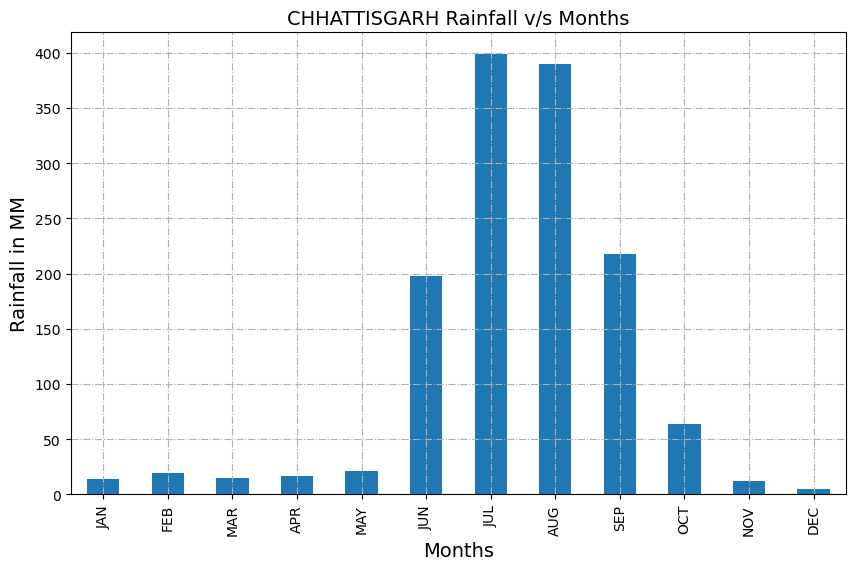

In [117]:
plt.figure(figsize=(10,6))
V[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("CHHATTISGARH Rainfall v/s Months",size=14)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

`From the above graph we observe that:-
CHHATTISGARH has good amount of rainfall in JUL and AUG`

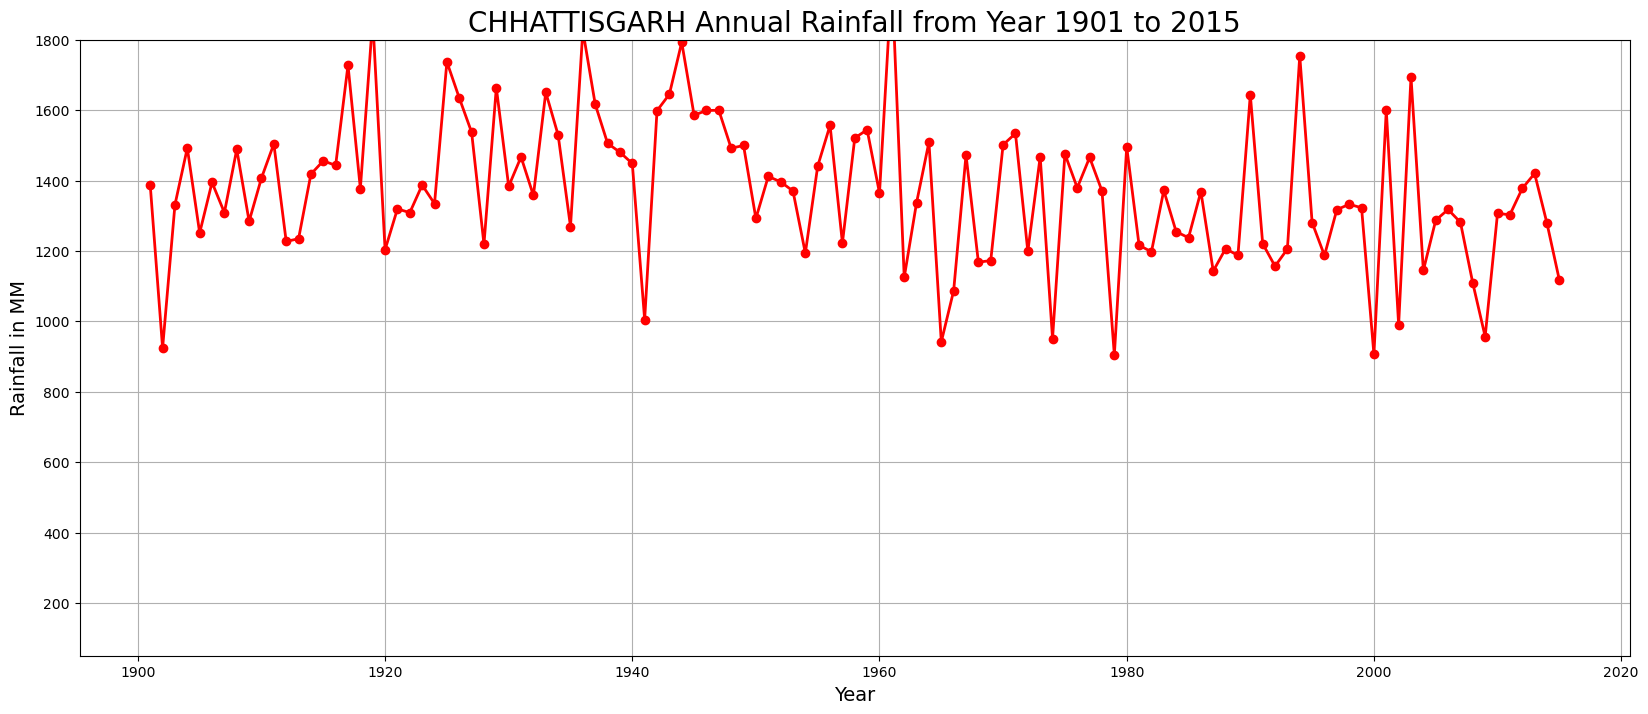

In [118]:
V.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1800),color='r',marker='o',linestyle='-',linewidth=2,figsize=(20,8));
plt.xlabel('Year',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title('CHHATTISGARH Annual Rainfall from Year 1901 to 2015',size=20)
plt.grid()
plt.show()

`From the Above graph we observe that:-
(1)The lowest rainfall in VIDARBHA was noted in 1920
(2)and, The highest Rainfall was noted in 1958`

## Modelling

In [119]:
df["SUBDIVISION"].nunique()

36

`nunique(): This method calculates the number of unique values in the selected column. It returns the count of distinct values in the "SUBDIVISION" column.`

In [120]:
group = df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
df=group.get_group(('CHHATTISGARH'))
df.head()

C:\Users\bhusa\AppData\Local\Temp\ipykernel_7692\1486666687.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']


YEAR   JAN    FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP    OCT  \
2967  1901  48.9  116.5  27.8   5.5  18.4  101.6  381.0  476.7  182.8   27.3   
2968  1902   0.6    6.5   0.4  13.9  10.3   37.2  403.8  236.6  198.1    4.7   
2969  1903   6.2   13.9   0.4   6.8  51.1  110.7  365.9  396.0  212.0  168.0   
2970  1904   0.0    8.6  32.3   0.2  77.5  369.5  303.6  483.6   86.8  129.3   
2971  1905  50.3   22.6  19.0  24.6  31.8   40.4  443.7  270.8  338.8    8.9   

      NOV  DEC  
2967  0.4  0.0  
2968  8.1  3.7  
2969  0.1  0.0  
2970  1.0  0.0  
2971  0.0  0.0

### Now making dataframe for Chhattisgarh to make easy test and train dataset

In [190]:
df2=df.melt(['YEAR']).reset_index()
df2.head()

index  YEAR variable  value
0      0  1901      JAN   48.9
1      1  1902      JAN    0.6
2      2  1903      JAN    6.2
3      3  1904      JAN    0.0
4      4  1905      JAN   50.3

### Grouping all the month variable into one singular month for easier comparison

In [122]:
df2= df2[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df2.head()

index  YEAR variable  value
0        0  1901      JAN   48.9
115    115  1901      FEB  116.5
230    230  1901      MAR   27.8
345    345  1901      APR    5.5
460    460  1901      MAY   18.4

In [123]:
df2.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [124]:
df2.columns=['Index','Year','Month','Avg_Rainfall']

In [125]:
df2.head()

Index  Year Month  Avg_Rainfall
0        0  1901   JAN          48.9
115    115  1901   FEB         116.5
230    230  1901   MAR          27.8
345    345  1901   APR           5.5
460    460  1901   MAY          18.4

In [126]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df2['Month']=df2['Month'].map(Month_map)
df2.head(12)

Index  Year  Month  Avg_Rainfall
0         0  1901      1          48.9
115     115  1901      2         116.5
230     230  1901      3          27.8
345     345  1901      4           5.5
460     460  1901      5          18.4
575     575  1901      6         101.6
690     690  1901      7         381.0
805     805  1901      8         476.7
920     920  1901      9         182.8
1035   1035  1901     10          27.3
1150   1150  1901     11           0.4
1265   1265  1901     12           0.0

In [127]:
df2.drop(columns="Index",inplace=True)

In [128]:
df2.head(2)

Year  Month  Avg_Rainfall
0    1901      1          48.9
115  1901      2         116.5

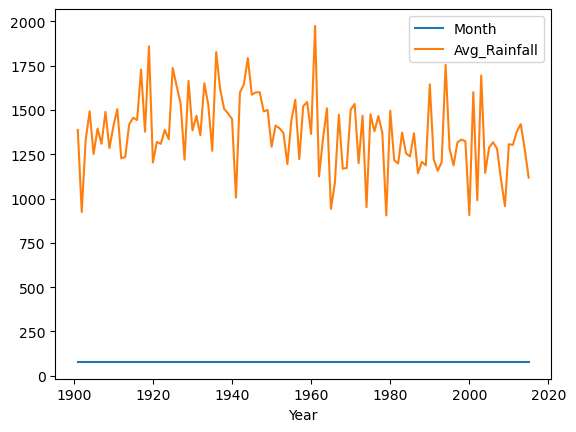

In [129]:
df2.groupby("Year").sum().plot()
plt.show()

In [130]:
X=np.asanyarray(df2[['Year','Month']]).astype('int')
y=np.asanyarray(df2['Avg_Rainfall']).astype('int')

In [131]:
X

array([[1901,    1],
       [1901,    2],
       [1901,    3],
       ...,
       [2015,   10],
       [2015,   11],
       [2015,   12]])

In [132]:
X[:15]

array([[1901,    1],
       [1901,    2],
       [1901,    3],
       [1901,    4],
       [1901,    5],
       [1901,    6],
       [1901,    7],
       [1901,    8],
       [1901,    9],
       [1901,   10],
       [1901,   11],
       [1901,   12],
       [1902,    1],
       [1902,    2],
       [1902,    3]])

In [133]:
y

array([ 48, 116,  27, ...,  17,   0,   1])

In [134]:
print(X.shape)
print(y.shape)

(1380, 2)
(1380,)


### Splitting the dataset into training and testing

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [136]:
X_train

array([[1959,    4],
       [1986,   10],
       [1993,    4],
       ...,
       [1944,   12],
       [1996,   10],
       [2008,    6]])

In [137]:
y_train

array([  3,  61,   4, ...,   0,  25, 236])

### ❏ Linear Regression Model


Linear regression is a fundamental statistical technique used for modeling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the independent variables (predictors) and the dependent variable (outcome). In its simplest form, linear regression tries to fit a straight line to the data points, allowing us to make predictions based on the input features.

Here's a brief overview of linear regression and why it's commonly used:

Model Representation:  In linear regression, the relationship between the independent variables 
x and the dependent variable y is represented by the equation of a straight line:

Fitting the Model: The goal of linear regression is to find the best-fitting line that minimizes the difference between the observed values and the values predicted by the model. This is typically done by minimizing the sum of squared differences between the actual and predicted values, known as the "least squares" method.

Interpretability: Linear regression provides interpretable coefficients that represent the change in the dependent variable for a one-unit change in the corresponding independent variable, holding other variables constant. This makes it easy to understand the impact of each predictor on the outcome.

Prediction: Once the model is trained on the data, it can be used to make predictions on new data. Linear regression is computationally efficient and can handle large datasets with ease.

Assumptions: Linear regression assumes that there is a linear relationship between the independent and dependent variables, the errors are normally distributed with constant variance (homoscedasticity), and the errors are independent of each other.

In [191]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

The reason we are using the Linear Regression as it is one of the intial Models we can implement to make prediction about the rainfall in Chhattisgarh. The fitting line will make it easier for us to analysis any relationship between the corresponding variables and predict accordingly.

In [192]:
# Predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [140]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_test_predict),2)

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 131.63071089420777
MSE: 27036.004806092686
RMSE: 164.42628988727043
Explained Variance Score: 0.03319369203473843 2

-------Train Data--------
MAE: 116.44693135336234
MSE: 21352.84107021977
RMSE: 146.12611358076887

-----Training Accuracy-------
4.1000000000000005
-----Testing Accuracy--------
2.1


Assessment:

The model's performance, as indicated by all metrics, is quite poor. It has high errors (MAE, MSE, and RMSE) and explains only a very small proportion of the variance in both the training and testing data.
The low explained variance score suggests that the model does not capture the underlying patterns in the data well.
The low training and testing accuracies indicate that the model is not effectively capturing the relationships between the independent and dependent variables.
Overall, this suggests that the linear regression model may not be suitable for accurately predicting the target variable in this scenario. Possible reasons could include insufficient or inappropriate features, non-linear relationships between variables, or inadequacies in the modeling approach. Further exploration and possibly the use of more complex models may be necessary to improve predictive performance.

In [193]:
predicted = LR.predict([[2014,2]])

In [194]:
predicted

array([66.11039607])

### ❏ Random Forest Model

Random Forest is a powerful and versatile ensemble learning technique used for both classification and regression tasks. Here's a brief overview of Random Forest and why it's commonly used:

Ensemble Learning: Random Forest belongs to the ensemble learning family of algorithms, which combines multiple individual models to create a more robust and accurate prediction model. It operates by constructing a multitude of decision trees during training and outputs the mode of the classes (for classification) or the average prediction (for regression) of the individual trees.

Decision Trees: Random Forest is built upon the concept of decision trees. Decision trees recursively split the data into subsets based on the most significant feature at each node, aiming to minimize impurity or maximize information gain. However, decision trees are prone to overfitting and can be unstable due to high variance.

Randomization and Aggregation: Random Forest addresses the limitations of individual decision trees by introducing randomness during training. It constructs each tree using a random subset of the features and a random subset of the training data (bootstrapping). Additionally, it aggregates the predictions of multiple trees to produce the final prediction, reducing variance and improving generalization performance.

Robustness and Accuracy: Random Forest is known for its robustness and high accuracy across a wide range of datasets. By averaging the predictions of many trees, it reduces the impact of outliers and noise in the data, leading to more reliable predictions. It also tends to perform well without extensive hyperparameter tuning.

Feature Importance: Random Forest provides a measure of feature importance, indicating the relative importance of each feature in making predictions. This information can be valuable for feature selection, understanding the underlying patterns in the data, and guiding further analysis.

Scalability: Random Forest is generally scalable and can handle large datasets with high dimensionality efficiently. It can be parallelized easily, making it suitable for distributed computing environments.

Versatility: Random Forest can be applied to various types of data, including structured and unstructured data, categorical and numerical features, and problems with multiple classes or continuous outcomes. It is widely used across different domains, including finance, healthcare, marketing, and more.

In [143]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [144]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [145]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 42.647350236147325
MSE: 4179.708864550534
RMSE: 64.6506679358422

-------Train Data--------
MAE: 30.250207685059134
MSE: 2204.9687108011476
RMSE: 46.95709436071559


Assessment:

The model seems to have relatively low errors on both the training and test data, as indicated by the MAE, MSE, and RMSE values.
The RMSE values are smaller compared to the range of the target variable, suggesting that the model's predictions are reasonably accurate.
The test error metrics (MAE, MSE, RMSE) are slightly higher than the corresponding training error metrics, indicating some degree of model generalization, but there might still be room for improvement to achieve better generalization.
In summary, based on these evaluation metrics, the model appears to perform reasonably well, with relatively low errors on both the training and test datasets. However, further analysis and possibly fine-tuning of the model may be necessary to improve its performance further, especially if the application demands higher accuracy or if there's room for improvement in generalization to unseen data.

In [146]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
90.10000000000001
-----------Testing Accuracy------------
84.89999999999999


Assessment:

The training accuracy is higher than the testing accuracy, which is expected as models tend to perform better on data they've seen during training.
There's a relatively small gap between the training and testing accuracies, suggesting that the model generalizes well to unseen data.
Both training and testing accuracies are quite high, indicating that the Random Forest model is effective in making accurate predictions on both the training and testing datasets.
However, it's essential to consider the context of the problem and whether the achieved accuracy levels are sufficient for the application requirements.

Overall, based on these accuracy scores, the Random Forest model appears to perform well and is likely a suitable choice for the given task. Further analysis, such as examining other evaluation metrics or conducting cross-validation, could provide additional insights into the model's performance and generalization ability.

In [147]:
predicted = random_forest_model.predict([[2014,2]])

In [148]:
predicted

array([18.02878542])

In [149]:
predicted = random_forest_model.predict([[2001,3]])

In [150]:
predicted

array([11.89281313])

### ❏ SVM

Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression tasks. Here's a brief overview of SVM and why it's commonly used:

1. **Linear and Non-linear Classification**: SVM is capable of performing linear and non-linear classification by finding the optimal hyperplane that best separates the classes in the feature space. For non-linear problems, SVM can use kernel functions to map the input features into a higher-dimensional space where a linear separation can be achieved.

2. **Maximizing Margin**: The key idea behind SVM is to find the hyperplane that maximizes the margin, i.e., the distance between the hyperplane and the nearest data points (support vectors) from each class. By maximizing the margin, SVM aims to achieve better generalization performance and robustness to noise.

3. **Effective in High-dimensional Spaces**: SVM works well in high-dimensional spaces, making it suitable for datasets with a large number of features. It can handle datasets where the number of features exceeds the number of samples.

4. **Robust to Overfitting**: SVM is less prone to overfitting compared to some other machine learning algorithms, especially when using a proper regularization parameter (C parameter in SVM).

5. **Effective with Small to Medium-sized Datasets**: SVM performs well with small to medium-sized datasets, particularly when the number of features is relatively large compared to the number of samples. It is widely used in various domains, including text classification, image recognition, bioinformatics, and finance.

6. **Versatility**: SVM can handle various types of data, including numerical and categorical features. It can be applied to both binary and multi-class classification problems using appropriate strategies such as one-vs-one or one-vs-all.

7. **Tuning Flexibility**: SVM offers flexibility in tuning hyperparameters such as the choice of kernel function (e.g., linear, polynomial, radial basis function), regularization parameter (C), and kernel parameters (e.g., degree for polynomial kernel, gamma for RBF kernel). This allows for fine-tuning the model to achieve optimal performance.

8. **Global Optimum**: SVM aims to find the global optimum solution, which means it is less likely to get stuck in local minima compared to some other optimization algorithms.


In [151]:
from sklearn import svm
svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train)

SVC()

In [152]:
y_train_predict=svm_regr.predict(X_train)
y_test_predict=svm_regr.predict(X_test)

In [153]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 130.9746376811594
MSE: 44759.061594202896
RMSE: 211.5633748884785

-------Train Data--------
MAE: 109.61684782608695
MSE: 34270.20742753623
RMSE: 185.12214191591517


In [154]:
print("-----------Training Accuracy------------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(svm_regr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
11.200000000000001
-----------Testing Accuracy------------
13.4


Assessment:

The model's performance, as indicated by MAE, MSE, RMSE, training accuracy, and testing accuracy, is quite poor.
Both the training and testing errors are relatively high, indicating that the model does not fit the data well and fails to accurately predict the target variable.
The low training and testing accuracies suggest that the model is not effectively capturing the underlying patterns in the data.
These results suggest that the SVM regression model may not be suitable for accurately predicting the target variable in this scenario. Possible reasons could include inappropriate choice of hyperparameters, insufficient feature engineering, or inadequacies in the modeling approach.
In summary, based on these evaluation metrics, the SVM regression model appears to perform poorly, and further analysis and potentially different modeling approaches may be necessary to improve predictive performance.

### ❏ Logistic Regression


Logistic Regression is a statistical method used for binary classification tasks, where the outcome variable has only two possible categories. Despite its name, it's primarily used for classification rather than regression. Here's an explanation of Logistic Regression and its use cases:

Model Representation: In Logistic Regression, the relationship between the independent variables x and the probability of a binary outcome y is modeled using the logistic function (also called the sigmoid function).
Probability Estimation: Logistic Regression estimates the probability that a given observation belongs to a particular class. It predicts the probability of the positive class (e.g., class 1) using the logistic function.

Decision Boundary: Logistic Regression predicts class labels by applying a threshold to the predicted probabilities. For example, if the predicted probability is greater than 0.5, the observation is classified as belonging to class 1; otherwise, it is classified as belonging to class 0.

Linear Decision Boundary: Logistic Regression models assume a linear decision boundary between the two classes. While this may seem limiting, Logistic Regression can still perform well in many real-world scenarios, especially when the relationship between features and the outcome is approximately linear or when there are only a few important features.

Interpretability: Logistic Regression provides interpretable coefficients that represent the change in the log odds of the outcome for a one-unit change in the corresponding independent variable, holding other variables constant. This makes it easy to understand the impact of each predictor on the probability of the positive class.

Regularization: Logistic Regression can be regularized to prevent overfitting by penalizing large coefficient values. This helps improve generalization performance, especially when dealing with high-dimensional data or when there are multicollinear features.

When to use Logistic Regression:

Binary Classification: Logistic Regression is well-suited for binary classification tasks, where the outcome variable has two categories (e.g., yes/no, pass/fail, spam/not spam).
Interpretability: When interpretability of the model is important, Logistic Regression provides easily interpretable coefficients that can be used to understand the relationship between predictors and the outcome.
Linear Decision Boundary: When the relationship between features and the outcome is approximately linear, Logistic Regression can perform well.
Probability Estimation: When you need probability estimates along with class predictions, Logistic Regression provides predicted probabilities that can be interpreted as the likelihood of belonging to a particular class.

In [155]:
from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(random_state=0,solver='lbfgs',class_weight='balanced', max_iter=10000)
logreg = LogisticRegression(random_state=0,solver='lbfgs')
logreg.fit(X_train,y_train)

c:\Users\bhusa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [156]:
y_train_predict=logreg.predict(X_train)
y_test_predict=logreg.predict(X_test)

In [157]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 130.69927536231884
MSE: 44744.48188405797
RMSE: 211.52891500704573

-------Train Data--------
MAE: 109.12409420289855
MSE: 34243.772644927536
RMSE: 185.0507299227094


In [158]:
print("-----------Training Accuracy------------")
print(round(logreg.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(logreg.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
8.200000000000001
-----------Testing Accuracy------------
12.3


Assessment:

The model's performance, as indicated by MAE, MSE, RMSE, training accuracy, and testing accuracy, is quite poor.
Both the training and testing errors are relatively high, indicating that the model does not fit the data well and fails to accurately predict the target variable.
The low training and testing accuracies suggest that the logistic regression model is not effectively capturing the underlying patterns in the data.
These results suggest that the logistic regression model may not be suitable for accurately predicting the target variable in this scenario. Possible reasons could include inappropriate choice of hyperparameters, insufficient feature engineering, or inadequacies in the modeling approach.
In summary, based on these evaluation metrics, the logistic regression model appears to perform poorly, and further analysis and potentially different modeling approaches may be necessary to improve predictive performance.







### ❏ xgboost

XGBoost (Extreme Gradient Boosting) is a powerful and widely used machine learning algorithm that belongs to the ensemble learning family, specifically the gradient boosting framework. Here's an explanation of XGBoost and its use cases:

1. **Gradient Boosting**: XGBoost is based on the gradient boosting framework, which sequentially builds an ensemble of weak learners (typically decision trees) to improve predictive performance. It combines multiple weak models to create a strong model, making it highly effective for both regression and classification tasks.

2. **Regularization**: XGBoost incorporates regularization techniques to prevent overfitting, such as L1 and L2 regularization (also known as Lasso and Ridge regularization). Regularization helps control the complexity of the model and improves generalization performance, especially when dealing with high-dimensional data or when there are multicollinear features.

3. **Tree Pruning**: XGBoost uses tree pruning algorithms to control the complexity of individual decision trees within the ensemble. Pruning removes branches of the tree that contribute little to overall model performance, reducing overfitting and improving computational efficiency.

4. **Optimized Performance**: XGBoost is designed for speed and performance optimization. It is implemented in C++ for efficiency and provides interfaces for various programming languages, including Python and R. XGBoost utilizes parallel and distributed computing techniques to scale efficiently to large datasets and is often significantly faster than other gradient boosting implementations.

5. **Flexibility**: XGBoost supports a wide range of customization options, including different loss functions, learning rates, tree construction algorithms, and handling of missing values. This flexibility allows practitioners to tailor the algorithm to specific problem domains and optimize performance for various metrics.

6. **Feature Importance**: XGBoost provides a feature importance metric that ranks the importance of input features based on their contribution to the model's predictive performance. This feature importance analysis helps identify key variables driving predictions and provides insights into the underlying data patterns.

7. **Handling Imbalanced Data**: XGBoost includes techniques to handle imbalanced datasets, such as adjusting class weights or incorporating sampling strategies. This makes it effective for classification tasks with unequal class distributions, where maintaining balance is crucial for model performance.

When to use XGBoost:
- **High Performance Requirements**: XGBoost is suitable for tasks where performance and efficiency are critical, such as large-scale datasets or real-time applications.
- **Structured Data**: XGBoost performs well on structured/tabular data with a mix of numerical and categorical features. It is widely used in domains such as finance, healthcare, marketing, and e-commerce.
- **Predictive Accuracy**: XGBoost is effective for tasks where predictive accuracy is paramount, as it often achieves state-of-the-art performance on benchmark datasets and competitions.
- **Feature Importance Analysis**: XGBoost is valuable when interpretability and understanding feature importance are important, as it provides insights into the relative importance of input features.
- **Ensemble Learning**: XGBoost is a go-to choice when ensemble learning techniques are desired, as it combines multiple weak models to create a strong ensemble with superior predictive performance.

In summary, XGBoost is a versatile and powerful algorithm that excels in various machine learning tasks, particularly when predictive accuracy, speed, and flexibility are important considerations. It is widely used in both industry and academia and has become a standard choice for many data science projects and competitions.

In [195]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [160]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [161]:
y_train_predict=xgb.predict(X_train)
y_test_predict=xgb.predict(X_test)

In [162]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 49.206166085206725
MSE: 5398.500773939976
RMSE: 73.47449063409678

-------Train Data--------
MAE: 11.294765052310549
MSE: 284.22900527689563
RMSE: 16.85909265876713


In [163]:
print("-----------Training Accuracy------------")
print(round(xgb.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(xgb.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
98.7
-----------Testing Accuracy------------
80.4


Assessment:

The model's performance seems to be quite good, with relatively low errors and high accuracy scores.
However, there's a significant discrepancy between the training and testing accuracies, suggesting potential overfitting. The model may be fitting too closely to the training data and not generalizing well to unseen data.
Further investigation, such as hyperparameter tuning, cross-validation, or regularization, may be needed to address overfitting and improve the model's generalization performance.
Overall, while the XGBoost model shows promising results, it's essential to ensure that it performs well on unseen data and can generalize effectively to new observations.

### ❏ Gradient Boosting Regressor

Gradient Boosting Regressor is a machine learning algorithm that belongs to the ensemble learning family, specifically the gradient boosting framework, and is used for regression tasks. Here's an explanation of Gradient Boosting Regressor and its use cases:

1. **Ensemble Learning**: Gradient Boosting Regressor combines multiple weak learners, typically decision trees, to create a strong predictive model. Unlike traditional decision trees, which are built independently, gradient boosting builds trees sequentially, with each tree attempting to correct the errors of the previous one.

2. **Gradient Boosting Framework**: The main idea behind gradient boosting is to fit a series of weak learners (typically shallow decision trees) to the residuals (the differences between the predicted and actual values) of the preceding model in the sequence. This process continues iteratively until a predefined number of trees (or a specified stopping criterion) is reached.

3. **Gradient Descent Optimization**: Gradient Boosting Regressor minimizes a loss function (such as mean squared error) using gradient descent optimization. In each iteration, the algorithm calculates the negative gradient of the loss function with respect to the model's predictions and updates the model's parameters (tree structure and leaf values) in the direction that minimizes the loss.

4. **Model Interpretability**: While individual trees in the ensemble may not be easily interpretable, the overall ensemble model can still provide insights into the relationship between input features and the target variable. Feature importance analysis can help identify the most influential features in making predictions.

5. **Regularization**: Gradient Boosting Regressor supports regularization techniques to prevent overfitting, such as shrinkage (learning rate) and tree-specific parameters like maximum depth, minimum samples per leaf, and maximum number of nodes. Regularization helps control the complexity of the model and improves generalization performance.

6. **Handling Non-linearity and Interactions**: Gradient Boosting Regressor is effective at capturing non-linear relationships and interactions between features. By fitting multiple trees to the residuals of the previous models, it can capture complex patterns in the data that may not be captured by a single tree or linear model.

7. **Robustness to Outliers and Noise**: Gradient Boosting Regressor is relatively robust to outliers and noisy data compared to some other algorithms. Since it builds trees sequentially, it can adapt to the data's structure and reduce the impact of outliers on the final predictions.

When to use Gradient Boosting Regressor:
- **High Predictive Accuracy**: Gradient Boosting Regressor often achieves state-of-the-art performance on regression tasks and is suitable when high predictive accuracy is crucial.
- **Structured Data**: It works well with structured/tabular data with a mix of numerical and categorical features, making it suitable for various domains such as finance, healthcare, and marketing.
- **Interpretability**: While not as interpretable as linear models, Gradient Boosting Regressor can still provide insights into feature importance and relationships between predictors and the target variable.
- **Handling Non-linearity**: It is effective at capturing non-linear relationships and interactions between features, making it suitable for datasets with complex patterns.
- **Robustness to Noise**: It is relatively robust to outliers and noisy data, which can be beneficial in real-world datasets with imperfect data quality.

In summary, Gradient Boosting Regressor is a powerful and versatile algorithm for regression tasks, known for its high predictive accuracy, flexibility, and robustness to noise. It is suitable for a wide range of applications and often outperforms other regression algorithms when used appropriately.

In [164]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [165]:
y_train_predict=gbr.predict(X_train)
y_test_predict=gbr.predict(X_test)

In [166]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 37.92802412377355
MSE: 3569.6953527612286
RMSE: 59.74692755917436

-------Train Data--------
MAE: 30.625077439012454
MSE: 2267.394346747329
RMSE: 47.61716441313289


In [167]:
print("-----------Training Accuracy------------")
print(round(gbr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(gbr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
89.8
-----------Testing Accuracy------------
87.1


Assessment:

The model's performance seems to be quite good, with relatively low errors and high accuracy scores.
The training and testing errors are both relatively low, indicating that the model fits the data well and generalizes effectively to unseen data.
The training and testing accuracies are also close, suggesting that the model does not suffer from significant overfitting.
Overall, the Gradient Boosting Regressor appears to perform well on both the training and testing datasets, with high accuracy and low error metrics. It seems to be a suitable model for the regression task at hand.

# Ensemble Stacking


Ensemble stacking, also known as stacked generalization, is a technique used in machine learning to combine multiple base models (learners) to improve predictive performance. Unlike traditional ensemble methods like bagging and boosting, which combine predictions from multiple models in a simple or weighted manner, ensemble stacking leverages the predictions of multiple base models as additional features to train a meta-model, which makes the final predictions.

### Summarizing the testing accuracies:

Linear Regression: 2.1%   
Random Forest: 84.9%    
Support Vector Machine (SVM): 13.4%   
Logistic Regression: 12.3%  
XGBoost: 80.4%   
Gradient Boosting Regressor: 87.1%

### ❏ Hybrid Model 1

The stacked model with meta learner = xgboost and the weak learners = Linear Regression, Random Forest and SVM

In [168]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [169]:
from mlxtend.regressor import StackingCVRegressor

In [170]:
stack = StackingCVRegressor(regressors=(LR, random_forest_model, svm_regr),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

StackingCVRegressor(cv=12,
                    meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                             

In [171]:
y_train_predict=stack.predict(X_train)
y_test_predict=stack.predict(X_test)

In [172]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 40.378671741895914
MSE: 4084.568060470248
RMSE: 63.910625567821256

-------Train Data--------
MAE: 33.54878885929297
MSE: 3079.6669918505445
RMSE: 55.494747425774854


In [173]:
print("-----------Training Accuracy------------")
print(round(stack.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
86.2
-----------Testing Accuracy------------
85.2


### ❏ Hybrid Model 2

The stacked model with meta learner = Linear Regression and the weak learners = Linear Regression, Random Forest and SVM 

In [174]:
stack2 = StackingCVRegressor(regressors=(LR, random_forest_model,svm_regr),
                            meta_regressor=LR, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack2.fit(X_train, y_train)

StackingCVRegressor(cv=12, meta_regressor=LinearRegression(), random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                SVC()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [175]:
y_train_predict=stack2.predict(X_train)
y_test_predict=stack2.predict(X_test)

In [176]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 40.28420213137581
MSE: 4030.7561997885923
RMSE: 63.488236704043

-------Train Data--------
MAE: 28.758221540629393
MSE: 2107.8707709128093
RMSE: 45.91155378456287


In [177]:
print("-----------Training Accuracy------------")
print(round(stack2.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack2.score(X_test,y_test),3)*100)

-----------Training Accuracy------------


90.5
-----------Testing Accuracy------------
85.39999999999999


In [178]:
from sklearn.metrics import r2_score

In [179]:
score = r2_score(y_test, y_test_predict)

In [180]:
score

0.8539830050162158

### ❏ Hybrid Model 3

The stacked model with meta learner = Logistic Regression and the weak learners = Linear Regression, Random Forest and SVM 

In [198]:
stack3 = StackingCVRegressor(regressors=(LR, random_forest_model,logreg),
                            meta_regressor=logreg, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack3.fit(X_train, y_train)

c:\Users\bhusa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bhusa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingCVRegressor(cv=12, meta_regressor=LogisticRegression(random_state=0),
                    random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                LogisticRegression(random_state=0)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [199]:
y_train_predict=stack3.predict(X_train)
y_test_predict=stack3.predict(X_test)

In [200]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 39.916666666666664
MSE: 4512.003623188406
RMSE: 67.17144946469747

-------Train Data--------
MAE: 34.408514492753625
MSE: 3053.1277173913045
RMSE: 55.255114852756435


In [201]:
print("-----------Training Accuracy------------")
print(round(stack3.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack3.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
86.3
-----------Testing Accuracy------------
83.7


### ❏ Hybrid Model 4

The stacked model with meta learner = Random Forest and the weak learners = Gradient Boosting regressor and xgBoost

In [226]:
stack4 = StackingCVRegressor(regressors=(xgb, random_forest_model,gbr),
                            meta_regressor=random_forest_model, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack4.fit(X_train, y_train)

StackingCVRegressor(cv=12,
                    meta_regressor=RandomForestRegressor(max_depth=100,
                                                         max_features='sqrt',
                                                         min_samples_leaf=4,
                                                         min_samples_split=10,
                                                         n_estimators=800),
                    random_state=42,
                    regressors=(XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enab...
                                             monotone_constraints=None,
 

In [227]:
y_train_predict=stack4.predict(X_train)
y_test_predict=stack4.predict(X_test)

In [228]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 37.59178859149885
MSE: 3600.9628643484907
RMSE: 60.008023333121805

-------Train Data--------
MAE: 31.947195666646515
MSE: 2545.5303912403388
RMSE: 50.45324956076009


In [229]:
print("-----------Training Accuracy------------")
print(round(stack4.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack4.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
88.6
-----------Testing Accuracy------------
87.0


### Final Assessments:

### Summarizing the testing accuracies:

Linear Regression: 2.1%   
Random Forest: 84.9%    
Support Vector Machine (SVM): 13.4%   
Logistic Regression: 12.3%   
XGBoost: 80.4%   
Gradient Boosting Regressor: 87.1%

I have performed the Ensemble Stacking to make hybrid model to increase accuracy of the Testing Dataset. For which I have tried many combinations of Models but the best approach for this is to take top three accurate model suitable to the dataframe which is:
Gradient Boosting > Random Forest > Xg Boost

From this Hybrid Model 4, I have got the accuracy score of 87.0 for Testing Data and a whopping 88.6% for the training dataset. 

For the other Hybrid Models:  
HM 1 : 85.2%  
HM 2 : 85.4%  
HM 3 : 83.7%  
HM 4 : 87.0%